In [1]:
from util import load_data, fdr, plot_report
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from collections import ChainMap

In [2]:
x_train, x_test, y_train, y_test = load_data('var_w2.csv')
x_train.head()

,name_dob_day_since,ssn_day_since,name_count_0_by_30,ssn_dob_count_7,ssn_count_7,homephone_count_14,fulladdress_homephone_count_0_by_14,fulladdress_homephone_count_0_by_30,fulladdress_count_1_by_7,fulladdress_count_1_by_14,...,fulladdress_homephone_count_14,ssn_firstname_count_0_by_30,address_count_1_by_30,name_dob_count_14,ssn_lastname_count_0_by_14,homephone_count_3,ssn_lastname_count_7,ssn_firstname_count_7,name_count_7,ssn_count_0_by_14
441021,-0.044702,-0.025696,0.316329,-0.055708,-0.058092,0.708788,0.120387,0.166392,0.09144,0.123861,...,-0.070089,0.171472,0.194244,-0.0686,0.123458,0.639149,-0.057154,-0.057185,-0.115648,0.124781
639433,0.648039,0.668458,0.316329,-0.055708,-0.058092,0.708788,0.120387,0.166392,0.09144,0.123861,...,-0.070089,0.171472,0.194244,-0.0686,0.123458,-0.521454,-0.057154,-0.057185,-0.115648,0.124781
151335,-1.050599,-1.033646,0.316329,-0.055708,-0.058092,0.135423,0.120387,0.166392,0.09144,0.123861,...,-0.070089,0.171472,0.194244,-0.0686,0.123458,0.639149,-0.057154,-0.057185,-0.115648,0.124781
617755,0.572122,0.592387,0.316329,-0.055708,-0.058092,0.135423,0.120387,0.166392,0.09144,0.123861,...,-0.070089,0.171472,0.194244,-0.0686,0.123458,-0.521454,-0.057154,-0.057185,-0.115648,0.124781
571128,-1.382735,-1.366459,-2.628672,-0.055708,-0.058092,-1.011308,0.120387,-5.622806,0.09144,0.123861,...,-0.070089,-5.484835,-4.773725,-0.0686,0.123458,-0.521454,-0.057154,-0.057185,-0.115648,0.124781


In [4]:
dt = DecisionTreeClassifier()
params = {'min_samples_leaf': [4**i for i in range(2, 6)],
          'class_weight': ['balanced', None],
          'criterion': ['gini', 'entropy']}
grid = GridSearchCV(dt, params, cv=10, refit='FDR', 
                    verbose=1, n_jobs=4,
                    scoring={'FDR': fdr, 'ROC': 'roc_auc'})
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  4.4min
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:  7.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid={'class_weight': ['balanced', None],
                    

In [5]:
print(f"The best parameters are {grid.best_params_} "
      f"with a score of {grid.best_score_:0.5f}")

The best parameters are {'class_weight': 'balanced', 'criterion': 'gini', 'min_samples_leaf': 256} with a score of 0.50628


In [9]:
pd.DataFrame(grid.cv_results_).filter(
    items=['param_class_weight', 'param_criterion',
           'param_min_samples_leaf', 'mean_test_FDR',
           'std_test_FDR', 'rank_test_FDR',
           'mean_test_ROC', 'std_test_ROC'])

,param_class_weight,param_criterion,param_min_samples_leaf,mean_test_FDR,std_test_FDR,rank_test_FDR,mean_test_ROC,std_test_ROC
0,balanced,gini,16,0.498082,0.014836,15,0.742812,0.005223
1,balanced,gini,64,0.502703,0.013150,8,0.753740,0.008205
2,balanced,gini,256,0.506276,0.015703,1,0.759078,0.005094
3,balanced,gini,1024,0.501220,0.012229,12,0.763344,0.004945
4,balanced,entropy,16,0.496339,0.013655,16,0.741100,0.003548
5,balanced,entropy,64,0.502441,0.011913,10,0.750879,0.006171
6,balanced,entropy,256,0.506189,0.015436,2,0.758354,0.005099
7,balanced,entropy,1024,0.502005,0.011719,11,0.761250,0.006081
8,None,gini,16,0.499216,0.013099,13,0.742365,0.004948
9,None,gini,64,0.504882,0.012855,6,0.753029,0.006455


In [20]:
dt = DecisionTreeClassifier(**grid.best_params_)
params = {'min_samples_leaf': range(128, 1025, 128)}
grid_2 = GridSearchCV(dt, params, cv=10, refit='FDR', 
                      verbose=1, n_jobs=4,
                      scoring={'FDR': fdr, 'ROC': 'roc_auc'})
grid_2.fit(x_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:  5.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=256,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'

In [23]:
print(f"The best parameters are {grid_2.best_params_} "
      f"with a score of {grid_2.best_score_:0.5f}")

The best parameters are {'min_samples_leaf': 256} with a score of 0.50706


In [22]:
pd.DataFrame(grid_2.cv_results_).filter(
    items=['param_min_samples_leaf', 'mean_test_FDR',
           'std_test_FDR', 'rank_test_FDR',
           'mean_test_ROC', 'std_test_ROC'])

,param_min_samples_leaf,mean_test_FDR,std_test_FDR,rank_test_FDR,mean_test_ROC,std_test_ROC
0,128,0.503659,0.013474,7,0.754525,0.006684
1,256,0.507058,0.013912,1,0.756680,0.007405
2,384,0.505140,0.013623,6,0.758603,0.007743
3,512,0.506361,0.013015,4,0.758633,0.006134
4,640,0.506797,0.014030,3,0.760778,0.007137
5,768,0.506186,0.013872,5,0.761621,0.007273
6,896,0.506971,0.014399,2,0.761025,0.007027
7,1024,0.502787,0.013102,8,0.760438,0.007201


In [47]:
param = ChainMap(grid_2.best_params_, grid.best_params_)

FDR: 0.5107839780896953

              precision    recall  f1-score   support

           0       0.99      0.92      0.96    197079
           1       0.09      0.54      0.16      2921

    accuracy                           0.92    200000
   macro avg       0.54      0.73      0.56    200000
weighted avg       0.98      0.92      0.94    200000



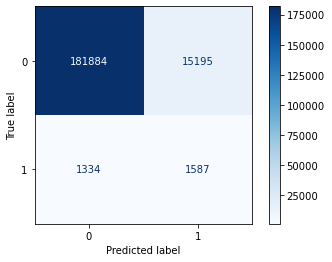

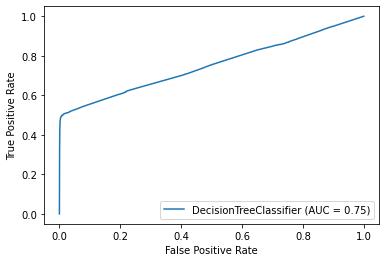

In [49]:
dt = DecisionTreeClassifier(**param).fit(x_train, y_train)
plot_report(dt, x_test, y_test)